In [50]:
import pandas as pd
import sidetable
import numpy as np
import matplotlib as plt
import seaborn as sns
import os


In [5]:
os.chdir('C:\\analise_ frebre_ amarela\\asset') #entra na pasta do dastaset
#print(os.getcwd())

1 Entendimento dos Dados
| Objetivo - Identificar as informações relevantes que serão necessárias para compor o objetivo do projeto, reconhecido como a confecção de um painel interativo (Dashboard).

Revisão dos dados
| Objetivo - Identificar as colunas de maior relevância, com base nas informações recebida e definidas como análises 

Identificação:

* ID: Identificador sequencial único 

* MACRORREG_LPI: Sigla da macrorregião do local provável de infecção 

* COD_UF_LPI: Código IBGE da Unidade Federada do local provável de infecção.

* UF_LPI: Sigla da Unidade Federada do local provável de infecção.

* COD_MUN_LPI: Código IBGE do município do local provável de infecção.
  
* SEXO IDADE: Sexo do indivíduo Idade do indivíduo.
   
* DT_IS: Data de início dos sintomas do indivíduo (dd/mm/aaaa).
  
* SE_IS : Semana epidemiológica de início dos sintomas do indivíduo.

* MES_IS: Mês de início dos sintomas do indivíduo.

* ANO_IS: Ano de início dos sintomas do indivíduo.

* MONITORAMENTO_IS: Período de monitoramento de início dos sintomas do indivíduo.

* OBITO: Evolução para o óbito.

* DT_OBITO: Data do óbito (dd/mm/aaaa).



In [6]:
df = pd.read_csv("dataset.csv", encoding='latin-1', delimiter=';')
df.head()

,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,N,14,RR,140005.0,ALTO ALEGRE,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM,01/12/1994
1,2,N,14,RR,140045.0,PACARAIMA,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO,NaN
2,3,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN,NaN
3,4,NE,21,MA,210060.0,AMARANTE DO MARANHÃO,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM,09/04/1995
4,5,N,15,PA,150270.0,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM,20/04/1995


In [ ]:
#dropando as colunas que não serão utilizada
df.drop(columns=['MACRORREG_LPI', 'COD_UF_LPI', 'COD_MUN_LPI', 'SE_IS'], inplace=True)

In [11]:
df.head()

,ID,UF,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO
0,1,RR,ALTO ALEGRE,M,NaN,29/11/1994,11.0,1994,1994/1995,SIM,01/12/1994
1,2,RR,PACARAIMA,M,19,19/02/1995,2.0,1995,1994/1995,NÃO,NaN
2,3,MA,AMARANTE DO MARANHÃO,M,32,01/04/1995,4.0,1995,1994/1995,IGN,NaN
3,4,MA,AMARANTE DO MARANHÃO,M,33,03/04/1995,4.0,1995,1994/1995,SIM,09/04/1995
4,5,PA,CONCEIÇÃO DO ARAGUAIA,M,26,12/04/1995,4.0,1995,1994/1995,SIM,20/04/1995


In [12]:
#renomendando as colunas
df = df.rename(columns={
    'DT_IS': 'DT_INIC_SINTOMA',
    'UF_LPI':'UF',
    'MUN_LPI': 'MUNICIPIO',
    'SE_IS': 'SEMANA_INICIO_SINTOMA',
    'MES_IS': 'MES_INICIO_SINTOMA',
    'ANO_IS': 'ANO_INICIO_SINTOMA',
    })

In [14]:
#tipos de colunas
df.dtypes
# as colunas idade, data_inic, ano_inic e data inicio precisa ser colocada no tipo certo

ID                      int64
UF                     object
MUNICIPIO              object
SEXO                   object
IDADE                  object
DT_INIC_SINTOMA        object
MES_INICIO_SINTOMA    float64
ANO_INICIO_SINTOMA      int64
MONITORAMENTO_IS       object
OBITO                  object
DT_OBITO               object
dtype: object

In [21]:
df.isnull().sum()

ID                       0
UF                       0
MUNICIPIO                6
SEXO                     1
IDADE                    8
DT_INIC_SINTOMA          5
MES_INICIO_SINTOMA      11
ANO_INICIO_SINTOMA       0
MONITORAMENTO_IS         0
OBITO                    0
DT_OBITO              1789
dtype: int64

In [22]:
#dropando algumas colunas e deixando a coluna DT_obito para dropar depois
df = df.dropna(subset=['MUNICIPIO', 'SEXO', 'IDADE', 'DT_INIC_SINTOMA', 'MES_INICIO_SINTOMA'])

In [23]:
df.isnull().sum()

ID                       0
UF                       0
MUNICIPIO                0
SEXO                     0
IDADE                    0
DT_INIC_SINTOMA          0
MES_INICIO_SINTOMA       0
ANO_INICIO_SINTOMA       0
MONITORAMENTO_IS         0
OBITO                    0
DT_OBITO              1772
dtype: int64

In [27]:
df.dtypes

ID                      int64
UF                     object
MUNICIPIO              object
SEXO                   object
IDADE                 float64
DT_INIC_SINTOMA        object
MES_INICIO_SINTOMA    float64
ANO_INICIO_SINTOMA      int64
MONITORAMENTO_IS       object
OBITO                  object
DT_OBITO               object
dtype: object

In [ ]:
#modificando os tipos de variaveis 
#Convertendo as strings para numeric
df['IDADE'] = pd.to_numeric(df['IDADE'])


In [35]:
#converttendo float em int
df = df.astype({'IDADE':'Int64'})

In [37]:
df = df.astype({'MES_INICIO_SINTOMA':'int64'})

In [38]:
df.dtypes

ID                     int64
UF                    object
MUNICIPIO             object
SEXO                  object
IDADE                  Int64
DT_INIC_SINTOMA       object
MES_INICIO_SINTOMA     int64
ANO_INICIO_SINTOMA     int64
MONITORAMENTO_IS      object
OBITO                 object
DT_OBITO              object
dtype: object

In [ ]:
#transformando object em datas
df['DT_INIC_SINTOMA'] = pd.to_datetime(df['DT_INIC_SINTOMA'], errors='coerce')
df['DT_OBITO'] = pd.to_datetime(df['DT_OBITO'], errors='coerce')

In [40]:
df.dtypes

ID                             int64
UF                            object
MUNICIPIO                     object
SEXO                          object
IDADE                          Int64
DT_INIC_SINTOMA       datetime64[ns]
MES_INICIO_SINTOMA             int64
ANO_INICIO_SINTOMA             int64
MONITORAMENTO_IS              object
OBITO                         object
DT_OBITO              datetime64[ns]
dtype: object

In [41]:
#filtrando a coluna OBITo e a coluna DT_OBITO dropando a linhas nulas da coluna dt_obito no qual tem obito mais não tem data sao paneas 33 registros que foram retirados 
df = df.query('not (OBITO == "SIM" and DT_OBITO.isnull())')
df

,ID,UF,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO
1,2,RR,PACARAIMA,M,19,1995-02-19,2,1995,1994/1995,NÃO,NaT
2,3,MA,AMARANTE DO MARANHÃO,M,32,1995-04-01,4,1995,1994/1995,IGN,NaT
3,4,MA,AMARANTE DO MARANHÃO,M,33,1995-04-03,4,1995,1994/1995,SIM,1995-09-04
5,6,AM,TAPAUÁ,M,29,1996-01-26,1,1996,1995/1996,SIM,1996-07-02
6,7,AM,RIO PRETO DA EVA,M,38,1996-01-27,1,1996,1995/1996,SIM,1996-05-02
...,...,...,...,...,...,...,...,...,...,...,...
2755,2756,PA,AFUÁ,M,18,2021-05-19,5,2021,2020/2021,IGN,NaT
2760,2761,TO,GURUPI,M,28,2022-03-19,3,2022,2021/2022,NÃO,NaT
2761,2762,SP,VARGEM GRANDE DO SUL,M,73,2022-12-27,12,2022,2022/2023,NÃO,NaT
2763,2764,AM,MARAÃ,M,12,2023-02-14,2,2023,2022/2023,NÃO,NaT


In [43]:
df.isnull().sum()

ID                       0
UF                       0
MUNICIPIO                0
SEXO                     0
IDADE                    0
DT_INIC_SINTOMA          1
MES_INICIO_SINTOMA       0
ANO_INICIO_SINTOMA       0
MONITORAMENTO_IS         0
OBITO                    0
DT_OBITO              1742
dtype: int64

In [44]:
#identificar e mostrar valores nulos 
df_missing = (
  df.isna().sum()
  .to_frame('qtd_dadosfaltantes')
  .join((df.isna().sum() / df.shape[0]).to_frame('%_dadosfaltantes'))
  .sort_values('qtd_dadosfaltantes', ascending=False)
)

df_missing['%_dadosfaltantes'] = df_missing['%_dadosfaltantes'].apply(lambda x: f"{x:.2%}")
df_missing

,qtd_dadosfaltantes,%_dadosfaltantes
DT_OBITO,1742,82.44%
DT_INIC_SINTOMA,1,0.05%
ID,0,0.00%
MUNICIPIO,0,0.00%
UF,0,0.00%
IDADE,0,0.00%
SEXO,0,0.00%
MES_INICIO_SINTOMA,0,0.00%
ANO_INICIO_SINTOMA,0,0.00%
MONITORAMENTO_IS,0,0.00%


In [46]:
df[df['DT_INIC_SINTOMA'].isnull()]

,ID,UF,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO
197,198,SP,OUROESTE,M,40,NaT,4,2000,1999/2000,SIM,2000-07-04


In [49]:
df = df.dropna(subset=['DT_INIC_SINTOMA'])

In [51]:
df.stb.missing()

,missing,total,percent
DT_OBITO,1742,2112,82.481061
UF,0,2112,0.000000
ID,0,2112,0.000000
MUNICIPIO,0,2112,0.000000
SEXO,0,2112,0.000000
DT_INIC_SINTOMA,0,2112,0.000000
IDADE,0,2112,0.000000
MES_INICIO_SINTOMA,0,2112,0.000000
ANO_INICIO_SINTOMA,0,2112,0.000000
MONITORAMENTO_IS,0,2112,0.000000


In [53]:
#filtrando os obitos 
obitos = df.query("OBITO == 'SIM'")
obitos

,ID,UF,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO
3,4,MA,AMARANTE DO MARANHÃO,M,33,1995-04-03,4,1995,1994/1995,SIM,1995-09-04
5,6,AM,TAPAUÁ,M,29,1996-01-26,1,1996,1995/1996,SIM,1996-07-02
6,7,AM,RIO PRETO DA EVA,M,38,1996-01-27,1,1996,1995/1996,SIM,1996-05-02
7,8,AM,MANAQUIRI,M,46,1996-01-30,1,1996,1995/1996,SIM,1996-11-02
15,16,AM,MANACAPURU,M,38,1996-06-30,6,1996,1995/1996,SIM,1996-05-07
...,...,...,...,...,...,...,...,...,...,...,...
2735,2736,AC,ACRELÂNDIA,M,16,2020-01-30,1,2020,2019/2020,SIM,2020-10-02
2737,2738,SC,CAMBORIÚ,M,42,2020-02-26,2,2020,2019/2020,SIM,2020-03-03
2748,2749,SC,SÃO BONIFÁCIO,M,59,2021-03-29,3,2021,2020/2021,SIM,2021-10-04
2750,2751,SC,BLUMENAU,M,39,2021-04-21,4,2021,2020/2021,SIM,2021-05-05


In [54]:
obitos.stb.missing()

,missing,total,percent
ID,0,370,0.0
UF,0,370,0.0
MUNICIPIO,0,370,0.0
SEXO,0,370,0.0
IDADE,0,370,0.0
DT_INIC_SINTOMA,0,370,0.0
MES_INICIO_SINTOMA,0,370,0.0
ANO_INICIO_SINTOMA,0,370,0.0
MONITORAMENTO_IS,0,370,0.0
OBITO,0,370,0.0


In [63]:
#agrupamento de obitos por Estado
agg_sexo = obitos.groupby('SEXO')[['OBITO']].count()
agg_sexo


,OBITO
SEXO,
F,47
M,323


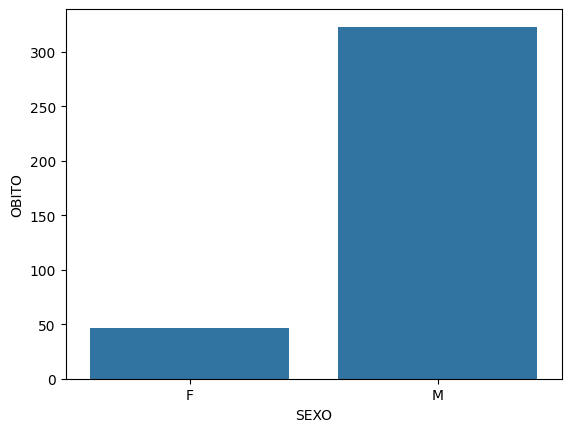

In [66]:
#plotando os dados atraves do seborn
sns.barplot(data=agg_sexo, x="SEXO", y="OBITO");


Observando o gráfico acima podemos ver o maiuor numero de obitos do sexo masculino

In [91]:
sexo_nun = {'F': 0, 'M': 1}
obitos['SEXO'] = obitos['SEXO'].map(sexo_nun);
obitos.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_8164\87811493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos['SEXO'] = obitos['SEXO'].map(sexo_nun);


,ID,UF,MUNICIPIO,SEXO,IDADE,DT_INIC_SINTOMA,MES_INICIO_SINTOMA,ANO_INICIO_SINTOMA,MONITORAMENTO_IS,OBITO,DT_OBITO
3,4,MA,AMARANTE DO MARANHÃO,NaN,33,1995-04-03,4,1995,1994/1995,SIM,1995-09-04
5,6,AM,TAPAUÁ,NaN,29,1996-01-26,1,1996,1995/1996,SIM,1996-07-02
6,7,AM,RIO PRETO DA EVA,NaN,38,1996-01-27,1,1996,1995/1996,SIM,1996-05-02
7,8,AM,MANAQUIRI,NaN,46,1996-01-30,1,1996,1995/1996,SIM,1996-11-02
15,16,AM,MANACAPURU,NaN,38,1996-06-30,6,1996,1995/1996,SIM,1996-05-07


In [90]:
#agrupamento de obitos por idade
agg_idade = obitos.groupby('IDADE')[['OBITO']].agg(['min', 'max'])
agg_idade

OBITO     
        min  max
IDADE           
0       SIM  SIM
3       SIM  SIM
4       SIM  SIM
7       SIM  SIM
10      SIM  SIM
...     ...  ...
84      SIM  SIM
85      SIM  SIM
86      SIM  SIM
88      SIM  SIM
89      SIM  SIM

[75 rows x 2 columns]